<a href="https://colab.research.google.com/github/lmaheshds/EVA6-Assignment9-RHRF/blob/main/Assign9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 8.0MB/s 
     |████████████████████████████████| 952kB 13.5MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65175 sha256=51f565c5cb024309ba793ec075f485b3a0fc3e324bf3bd969e53e4566417c19c
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


# Cloning Git Repo

In [5]:
!git clone "https://github.com/lmaheshds/EVA6-Assignment9-RHRF.git"

Cloning into 'EVA6-Assignment9-RHRF'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 136 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (136/136), 432.23 KiB | 6.75 MiB/s, done.
Resolving deltas: 100% (47/47), done.


Change Directory

In [3]:
%cd "EVA6-Assignment9-RHRF/Allfiles/"

/content/EVA6-Assignment9-RHRF/Allfiles


CIFAR-10 Data Loading

In [4]:
from dataloader import ImageDataLoader
from datatransform import CIFAR10Transforms
import albumentations as A

In [5]:
DATA_DIR = 'data'

cifar10 = CIFAR10Transforms()

custom_train_tfms = [A.PadIfNeeded(min_height=40,min_width=40), 
                     A.RandomCrop(32, 32, p=1.0),
                     A.HorizontalFlip(),
                     A.Cutout(num_holes=2, max_h_size=8, max_w_size=8, fill_value=0, always_apply=False, p=0.1),
                     ]
train_transform,  test_transform = cifar10.build_transforms(train_tfms_list=custom_train_tfms, test_tfms_list=[])

image_loader = ImageDataLoader(train_transform, test_transform, DATA_DIR, 512, True, 'CIFAR10', figure_size=(20,10))


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train data

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


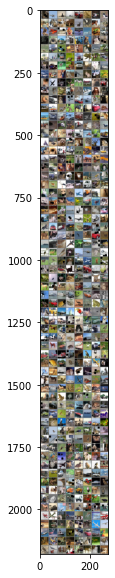

In [6]:
image_loader.show(dataset_type='train')

Test Data

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


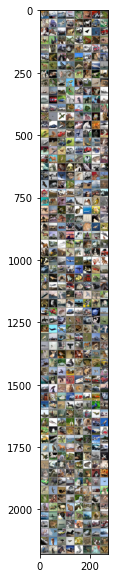

In [7]:
image_loader.show(dataset_type='test')

Custom ResNet Architecture

In [8]:
import torch.nn as nn
import torch.nn.functional as F
from resnetmodels import CustomResNet
from traintest import Learner

In [10]:
criterion = F.nll_loss #(Negative Log loss)
cnn_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=CustomResNet(),loss_func=criterion)

Model Summary

In [11]:
cnn_learner.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         294,912
        MaxPool2d-14            [-1, 25

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Learning rates

In [12]:
import torch
import torch.optim as optim
from learningratefinder import LRFinder

LR Minimum

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.01E-03


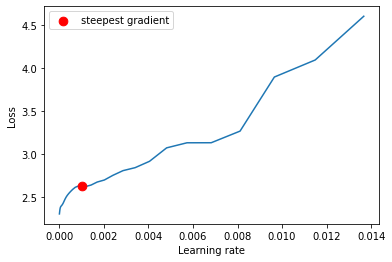

In [13]:
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=1e-7, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_finder = LRFinder(cnn_learner.model, optimizer, criterion, device="cuda" )
lr_finder.range_test(train_loader=image_loader.train_loader, val_loader=image_loader.test_loader, end_lr=3, num_iter=100)
lr_finder.plot(log_lr=False)
lr_finder.reset()

LR Maximum

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.27E-01


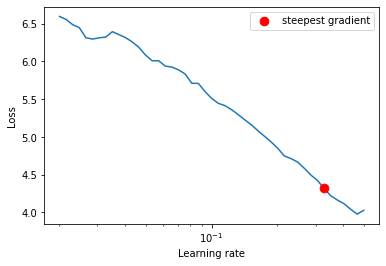

In [16]:
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=1e-2, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_finder = LRFinder(cnn_learner.model, optimizer, criterion, device="cuda" )
lr_finder.range_test(image_loader.train_loader, end_lr=10, num_iter=100)
lr_finder.plot(log_lr=True)
lr_finder.reset()

Training the model

In [3]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_max= 3.27E-01
lr_min = 1.01E-03
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=0.27, momentum=0.9, weight_decay=cnn_learner.weight_decay)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
#lr_scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=lr_min, max_lr=lr_max, step_size_up=490, step_size_down=1470)

NameError: ignored

In [19]:
cnn_learner.fit_custom(5,optimizer,scheduler,pass_loss=False)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=1.399446725845337 Batch_id=97 Accuracy=38.08: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3403, Accuracy: 5132/10000 (51.32%)

EPOCH: 1


Loss=1.1345362663269043 Batch_id=97 Accuracy=55.21: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1641, Accuracy: 5946/10000 (59.46%)

EPOCH: 2


Loss=0.8534585237503052 Batch_id=97 Accuracy=61.91: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0203, Accuracy: 6475/10000 (64.75%)

EPOCH: 3


Loss=0.8019513487815857 Batch_id=97 Accuracy=67.82: 100%|██████████| 98/98 [00:59<00:00,  1.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0949, Accuracy: 6454/10000 (64.54%)

EPOCH: 4


Loss=0.7703885436058044 Batch_id=97 Accuracy=71.65: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]



Test set: Average loss: 0.8110, Accuracy: 7115/10000 (71.15%)



Plot Losses and Accuracy

In [2]:
cnn_learner.plot_losses()

NameError: ignored

Test data Learner

In [ ]:
from differencer import Interpreter

In [ ]:
intrepret = Interpreter(model=cnn_learner.model, dataloader=image_loader.test_loader, classes=image_loader.classes)

Confusion Matrix

In [ ]:
intrepret.plot_confusion_matrix()

Performance Metrics

In [ ]:
intrepret.show_classification_report()

,precision,recall,f1-score,support
plane,0.819106,0.8060,0.812500,1000.0000
car,0.911538,0.9480,0.929412,1000.0000
bird,0.750795,0.7080,0.728770,1000.0000
cat,0.895671,0.8070,0.849027,1000.0000
deer,0.746454,0.8420,0.791353,1000.0000
dog,0.923326,0.8550,0.887850,1000.0000
frog,0.899295,0.8930,0.896136,1000.0000
horse,0.775374,0.9320,0.846503,1000.0000
ship,0.972445,0.8470,0.905398,1000.0000
truck,0.905138,0.9160,0.910537,1000.0000
